In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from math import sqrt
from scipy import stats

from pydataset import data

from env import host, user, password

# 1  Statistical Distributions - Quick Look

### **Uniform Distribution**

- allows us to model events where the outcome is discrete, and each outcome has an equally likely chance of occurring.

### *What You Need*

Finite number of outcomes equally likely to happen.

### *So what?*

Allows you to construct a random variable that has an equal opportunity of being any one of the integers in the range you establish using the start (inclusive) and stop (exclusive) below.

### *Now What?*

`stats.randint(start, stop)`

### Binomial Distribution 

- allows us to model the number of successes after a number of trials, given a certain probability of success. This distribution assumes that each trial is independent. Discrete, upper bound by # of events

### *What You Need*

n = trials

p = p(success)

### *So what?*

returns the likelihood of successes

### *Now What?*

`stats.binom(n, p)`

### Normal Distribution 

- allows us to model a continuous random variable where the further away from the mean you are, the less likely the outcome.

### *What You Need*

mean

standard deviation

### *So what?*

The Standard Normal Distribution is a normal distribution with a mean of 0 and a standard deviation of 1.

### *Now What?*

`stats.norm(mean, standard deviation)`

### Poisson Distribution
- allows us to model a situation where a certain number of events happen over a specified time interval. This distribution assumes that the events are independent of each other. Continuous, not upper bound. Can go off into ∞
 
### *What You Need*

average rate

### *So what?*

Returns the number of events that can be classified as successes or failures.

### *Now What?*

`stats.poisson(average rate)`

**PDF** (Probability Density Function) / **PMF** (Probability Mass Function) - The probability that your random variable takes on an **EXACT** value.

`distribution.pdf(probability/continuous)`

`distribution.pmf(value/discrete)`

**CDF** (Cumulative Density Function) / **PPF** (Percent Point Function) - The probability that your random variable takes on a value **less than or equal to** a given point.

`distribution.cdf(value/discrete)`

`distribution.ppf(probability/continuous)`

**SF** (Survival Function) / **ISF** (Inverse Survival Function) - The probability that your random variable takes on a value **greater than** a given point.

`distribution.sf(value/discrete)`

`distribution.isf(probability/continuous)`

# 2 The Central Limit Theorem - Proof of Concept

## What's so important about The Central Limit Theorem?

If we repeatedly take random samples of the same size from a the same population, and compute the sample mean for each of the samples, the sampling distribution of the sample means will be a normal distribution no matter what the initial distribution of the population was.

Even if our original population has a skewed distribution, our sampling distribution will be normal if we have a large enough sample!

## *So what?!*

In hypothesis testing, the assumption is that our data is from a normal distribution. In real life, our data is usually NOT normally distributed! (Think of the salaries in the Employees database or the home values in the Zillow database.)

## *Now What?*

The Central Limit Theorem and an appropriate sample size allow us to get around the problems of skewed, real-world data distributions, assume our sample data is normally distributed, and run our hypotheses tests.

In [10]:
n_dice_per_experiment = ncols = 10
n_experiments = nrows = 100

In [18]:
# Create 2-d array of random numbers between 1 and 6 to represent ten dice rolls for each column

dataset = np.random.randint(1, 7, (nrows, ncols))

dataset[:4]

array([[2, 6, 3, 2, 4, 6, 1, 2, 2, 4],
       [6, 6, 2, 5, 2, 1, 2, 5, 2, 2],
       [6, 1, 1, 1, 2, 4, 2, 4, 6, 2],
       [3, 2, 3, 3, 1, 5, 4, 3, 6, 1]])

In [19]:
# Calculate the average for each set of 10 dice rolls

calculated_averages = dataset.mean(axis=1)
calculated_averages

array([3.2, 3.3, 2.9, 3.1, 2.8, 3.7, 3.1, 3.1, 4.5, 2.7, 4.3, 3.5, 3.8,
       2.6, 4.5, 3. , 3.5, 2.9, 3. , 3.4, 3.7, 2.8, 3.7, 3.5, 4.6, 4.2,
       3.6, 2.3, 4.2, 4.1, 4.4, 3.1, 4.2, 4.1, 3.7, 3.1, 3.7, 2.8, 3.7,
       3.8, 2.7, 4.1, 2.8, 3.1, 3.7, 3.3, 2.3, 3.8, 4.2, 3.9, 4. , 4.1,
       3. , 4.2, 3.8, 2.7, 4.4, 3.8, 3.1, 2.7, 2.6, 4. , 3.1, 4.2, 3.7,
       3.2, 4.2, 3.1, 3.7, 3.4, 3.7, 4.4, 4.1, 3.4, 2.8, 3. , 3.2, 4.3,
       3.2, 2.9, 4. , 3.7, 3.6, 2.9, 3.8, 3.8, 3.6, 3.5, 4.5, 3.7, 2. ,
       2.7, 3.8, 4.1, 3.6, 3.3, 3.4, 4.6, 3.3, 3.7])

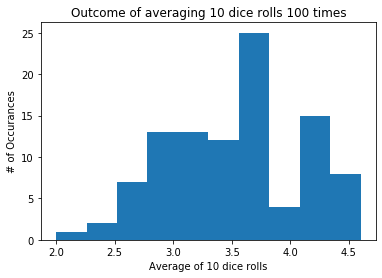

In [20]:
# Visualize the distribution of the 100 oberservations of 10 dice rolls

plt.hist(calculated_averages)
plt.xlabel(f'Average of {n_dice_per_experiment} dice rolls')
plt.ylabel('# of Occurances')
plt.title(f'Outcome of averaging {n_dice_per_experiment} dice rolls {n_experiments} times')
plt.show()

3  Hypothesis Testing - Overview
What is Hypothesis Testing?
We use hypothesis tests to draw conclusions, answer questions, or interpret beliefs we have about a population using sample data.
A hypothesis test evaluates two mutually exclusive statements about a population and informs us which statement is best supported by our sample data.
𝐻0
H
0
 : There is no difference between smokers' tips and the overall population's tip average.
𝐻𝑎
H
a
 : There is a difference between smokers' tips and the overall population's tip average.
So what?!
There are two possible outcomes; if the result confirms the hypothesis, then you've made a measurement. If the result is contrary to the hypothesis, then you've made a discovery - Enrico Fermi
Now What?
Set up a hypothesis.
Calculate a test statistic.
Find a p-value from the test statistic.
Reject or fail to reject your Null hypothesis

# 3 Hypothesis Testing - Overview

## What is Hypothesis Testing?

We use hypothesis testing to draw conclusions, answer questions, or interpret beliefs we have about a population using sample data.

A hypothesis test evaluates two mutually exclusive statements about a population and informs us which statement is best supported by our sample data.

> - $H_0$: There is no difference between smokers' tips and the overall population's tip average.
 
> - $H_a$: There is a difference between smokers tips and the overall population's tip average.
 
 ## *So what?!*
 
*There are two possible outcomes; if the result confirms the hypothesis, then you've made a measurement. If the result is contrary to the hypothesis, then you've made a discovery - Enrico Fermi*

## *Now what?!*

> 1. Setup a hypothesis.
1. Calculate a test statistic.
1. Find a p-value from the test statistic.
1. Reject or fail to reject your Null hypothesis.

## 3.1 Hypothesis Testing Errors

## *What is a Type I Error == False Positive?*

- We predict there is a difference when in reality there is no difference

- We reject the null hypothesis when the null hypothesis is actually True

## *So what?!*

If we are trying to determine whether a customer will churn, and our model predicts that they will churn (positive for churn), but they do not end up chuurning (False prediction), this is a False Positive. We have wasted time and money trying to woo a customer who was not going to leave us.

## *What is a Type II Error == False Negative?*

- We predict that there is no difference when in reality there is a difference

- We fail to reject the null hypothesis when the null hypothesis is actually False

## *So what?!*

If we are trying to determine whether a customer will churn, and our model predicts that they will not churn (negative for churn), but they end up churning (False Prediction), this is a False Negative. We lost the opportunity to woo a customer that was going to leave us before they left.

## *Now what?!*

If we have a classification model that predicts customer churn, we can decide how to balance our Type I and Type II Errors to have a model that suits our needs.

# 4. T-Test - Continuous vs. Categorical Variables

## *What is a T-Test?!*

- A type of inferential statistic used to determine if there is a significant difference between the means of two groups which may be related in certain features

- It compares a categorical and a continuous variable by comparing the mean of the continuous variable by subgroups or the mean of a subgroup to the mean of the population

## *So what?!*

We can ask questions like:

- **One Sample T-Test** is when we compare the mean for a subgroup to the population mean.
> Are sales for group A higher when we run a promotion?

- **Two Sample T-Test** is when we compare the mean of one sub group to the mean of another subgroup.
> Do customers who recieve a promotion spend more money than those who don't?

## *Now what?!*

- If your p-value is higher than your *alpha*, you fail to reject your null hypothesis.

- If your p-value is lower than your *alpha*, you reject your null hypothesis.

> **Types of T-Tests**:

- **one-tailed test** looks for a specific difference: appropriate if you only want to determine if there is a difference between groups in a specific direction, positive only or negative only.
- **two-tailed test looks** looks for any difference: appropriate if you want to test for the possibility of both positive or negative differences.
- **one-sample t-test** compare the mean of a subgroup with the population mean.

`scipy.stats.ttest_1samp(a, popmean)`

a = array, list, Series

popmean = single value

- **two-sample t-test** compares the means of two subgroups.

`scipy.stats.ttest_ind(a, b)`

a = array, list, Series

b = array, list, Series

> **Important Terms**

- **a confidence level** is the probability that if a poll/test/survey were repeated over and over again, the results obtained would be the same. It conveys how confident we are in our results. Raising your confidence level lowers your chances of Type I Errors, or False Positivews. (Common examples might be 90%, 95%, or 99%)

- **alpha --> $a$** = 1 - confidence level. If your p-value is less than your $a$, which you set before you begin your test, then your test findings are significant. If it is close, it is at your discretion. Your results still may be significant even though slightly above your chosen cutoff. Also, alpha is the maximum probability that you have a Type I Error.
> For a 95% confidence level, the value of alpha is .5 which means there is a 5% probability that you will reject a True null hypothesis or have a False Positive.
- **t-statistic** is simply the calculated difference represented in units of standard error. The greater the magnitude of *t*, the greater the evidence against the null hypothesis. Why does it matter? **Short answer**, it allows us to calculate our p-value!
- **p-values** are values we obtain from hypothesis testing. They represent the probability that our obtained result is due to chance given that our stated hypothesis is true.

In [21]:
df = data('tips')

In [22]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


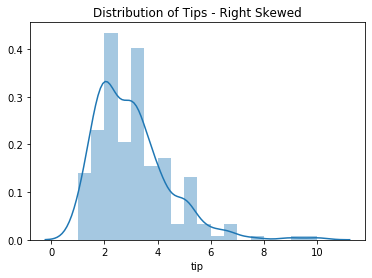

In [23]:
# T-Tests assume that the continuous variable is normally distributed,
# so we need to do a quick check of this.

sns.distplot(df.tip)
plt.title('Distribution of Tips - Right Skewed')
plt.show()

## 4.1 Compare mean and median of df.tip

- The distribution is right-skewed, so we see below the mean is slightly higher than the median.

In [24]:
print(f'The mean is: {df.tip.mean()}, and the median is {df.tip.median()}')
print('This is close enough to normal to continue.')

The mean is: 2.9982786885245902, and the median is 2.9
This is close enough to normal to continue.


## 4.2 Calculate the t-statistic and p-value for a One Sample T-Test by hand

> $H_0$: There is no difference between smokers' tips and the overall population's tip average.

> $H_a$: There is a difference between smokers' tips and the overall population's tip average.

In [26]:
confidence_interval = .95
alpha = round(1 - confidence_interval, 2)
print(f'alpha = {alpha}')

alpha = 0.05


In [31]:
smokers = df[df.smoker == 'Yes']
smokers.head()

,total_bill,tip,sex,smoker,day,time,size
57,38.01,3.00,Male,Yes,Sat,Dinner,4
59,11.24,1.76,Male,Yes,Sat,Dinner,2
61,20.29,3.21,Male,Yes,Sat,Dinner,2
62,13.81,2.00,Male,Yes,Sat,Dinner,2
63,11.02,1.98,Male,Yes,Sat,Dinner,2


In [28]:
pop_mean = df.tip.mean()
pop_mean

2.9982786885245902

In [32]:
xbar = smokers.tip.mean()
xbar

3.008709677419355

In [33]:
smokers_standard_dev = smokers.tip.std()
smokers_standard_dev

1.4014675738128255

In [34]:
n = smokers.shape[0]
n

93

In [35]:
degf = n - 1
degf

92

In [36]:
standard_error = smokers_standard_dev / sqrt(n)
standard_error

0.14532541757749468

In [37]:
t = (xbar - pop_mean) / (smokers_standard_dev / sqrt(n))
t

0.07177676877620093

In [44]:
print(f'Our t-statistic for smokers\' tips is {t:.4f}.')

Our t-statistic for smokers' tips is 0.0718.


In [45]:
p = stats.t(degf).sf(t) * 2
p

0.9429353685499238

In [46]:
print(f'Our p-value for smokers\' tips is {p}.')
print(f'This means there is about a {round(p * 100,2)}% chance that we observe the data we have.')

Our p-value for smokers' tips is 0.9429353685499238.
This means there is about a 94.29% chance that we observe the data we have.


In [47]:
print(f't = {t:.4f}')
print(f'p = {p:.4f}')

t = 0.0718
p = 0.9429


In [48]:
print(f'Our p-value is less than our alpha: {p < alpha}')

Our p-value is less than our alpha: False


### We fail to reject the null hypothesis that there is no difference in the average tip of smokers and the general population.

## 4.3 Calculate the t-statistic and p-value using *scipy.stats module*

In [49]:
t, p = stats.ttest_1samp(smokers.tip, df.tip.mean())
t, p

(0.07177676877620091, 0.9429353685499238)

In [50]:
print(f't = {t:.4f}')
print(f'p = {p:.4f}')

t = 0.0718
p = 0.9429


In [51]:
print(f'Our p-value is less than our alpha: {p < alpha}')

Our p-value is less than our alpha: False


### Now that is awesome!

## 4.4 Calculate the t-statistic and p-value for a Two Sample T-Test by hand

>$H_0$: There is no difference between women's and men's tips

>$H_a$: There is a difference between women's and men's tips

In [52]:
confidence_interval = .95
alpha = round(1 - confidence_interval, 2)
print(f'alpha = {alpha}')

alpha = 0.05


In [53]:
males = df[df.sex == 'Male']
males.head()

,total_bill,tip,sex,smoker,day,time,size
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
6,25.29,4.71,Male,No,Sun,Dinner,4
7,8.77,2.00,Male,No,Sun,Dinner,2


In [54]:
females = df[df.sex == 'Female']
females.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
12,35.26,5.00,Female,No,Sun,Dinner,4
15,14.83,3.02,Female,No,Sun,Dinner,2
17,10.33,1.67,Female,No,Sun,Dinner,3


In [61]:
males_xbar = males.tip.mean()
females_xbar = females.tip.mean()

In [62]:
males_xbar

3.0896178343949052

In [63]:
females_xbar

2.833448275862069

In [64]:
n_males = males.shape[0]
n_females = females.shape[0]

print(f'There are {n_males} males in the data.')
print(f'There are {n_females} females in the data.')

There are 157 males in the data.
There are 87 females in the data.


In [65]:
std_males = males.tip.std()
std_females = females.tip.std()

In [66]:
degf = n_males + n_females - 2

In [67]:
s_p = sqrt(((n_males - 1) * std_males**2 + (n_females - 1) * std_females**2) / (n_males + n_females - 2))

In [68]:
standard_error = sqrt(std_males**2 / n_males + std_females**2 / n_females)
standard_error

0.17197939068320425

In [69]:
print(f'The t-statistic for the two sample t-test comparing male to female tips is {round(t,3)}.')

The t-statistic for the two sample t-test comparing male to female tips is 0.072.


In [70]:
p = stats.t(degf).sf(t) * 2
p

0.9428388446509838

In [71]:
print(f'Our p-value is {round(p, 3)}.')
print(f'This means there is about a {round(p * 100, 2)}% chance that we observe the data we have.')

Our p-value is 0.943.
This means there is about a 94.28% chance that we observe the data we have.


In [72]:
print(f'Our p-vale is less than our alpha: {p < alpha}')

Our p-vale is less than our alpha: False


### We fail to reject the null hypothesis that this is no difference in the average tip of women and men. But, this is still a pretty low p-value. There could *still* be something here, within the data.

## 4.5 Calculate the t-statistic and p-value using *scipy.stats module*

In [73]:
t, p = stats.ttest_ind(males.tip, females.tip)
t, p

(1.3878597054212687, 0.16645623503456763)

In [74]:
print(f'The t-statistic for the two sample t-test comparing male to female tips is {round(t, 3)}.')

The t-statistic for the two sample t-test comparing male to female tips is 1.388.


In [75]:
print(f'Our p-value is {round(p, 3)}.')
print(f'This means there is about a {round(p * 100, 2)}% chance that we observe the data we have.')

Our p-value is 0.166.
This means there is about a 16.65% chance that we observe the data we have.


In [76]:
print(f'Our p-value is less than our alpha: {p < alpha}')

Our p-value is less than our alpha: False


### Still, a 16.65% p-value is pretty low.

## 4.6 T-Test Exercises

### 4.6.1 Use the mpg data set

In [78]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [79]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
manufacturer    234 non-null object
model           234 non-null object
displ           234 non-null float64
year            234 non-null int64
cyl             234 non-null int64
trans           234 non-null object
drv             234 non-null object
cty             234 non-null int64
hwy             234 non-null int64
fl              234 non-null object
class           234 non-null object
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


### 4.6.2 Is there a difference in fuel efficiency in cars from 2008 and 1999.

>$H_0$: There is no difference in fuel efficiency in cars from 2008 and 1999.

>$H_a$: There is a differnce in the fuel effiency in cars from 2008 and 1999.

In [80]:
mpg['avg_mileage'] = (mpg['cty'] + mpg['hwy']) / 2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [81]:
cars99 = mpg[mpg.year == 1999].avg_mileage
cars99.head()

1    23.5
2    25.0
5    21.0
6    22.0
8    22.0
Name: avg_mileage, dtype: float64

In [82]:
cars08 = mpg[mpg.year == 2008].avg_mileage
cars08.head()

3     25.5
4     25.5
7     22.5
10    24.0
11    23.0
Name: avg_mileage, dtype: float64

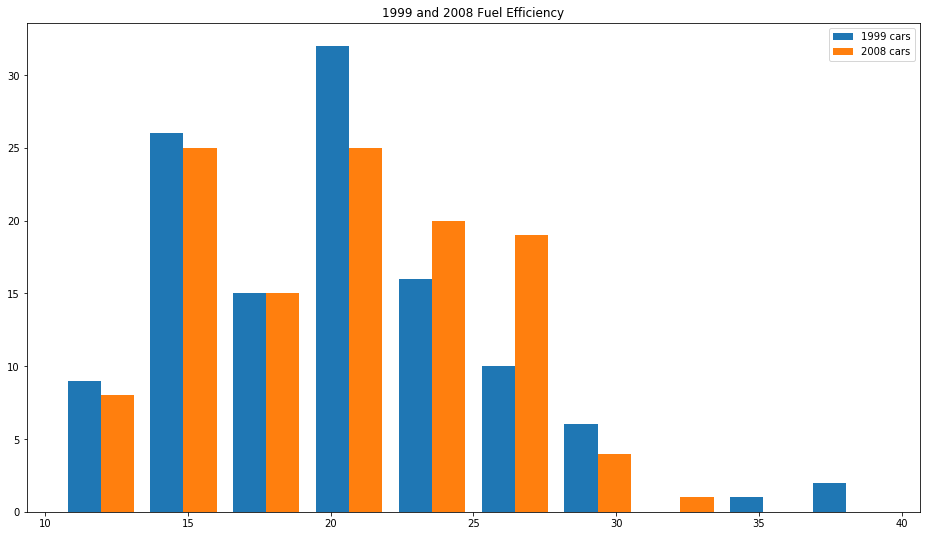

In [100]:
# Quick plot of the data
plt.figure(figsize=(16, 9))

plt.hist([cars99, cars08], label=["1999 cars", "2008 cars"])
plt.legend(loc='best')
plt.title('1999 and 2008 Fuel Efficiency')
plt.show()

In [84]:
t, p = stats.ttest_ind(cars99, cars08)
t, p

(0.21960177245940962, 0.8263744040323578)

In [85]:
print('t-statistic: ', t)
print('p-value: ', p)

t-statistic:  0.21960177245940962
p-value:  0.8263744040323578


In [86]:
print(f'Our p-value is less than our alpha: {p < alpha}')

Our p-value is less than our alpha: False


### We faile to reject the null hypothesis. Our high .83 p-value tells us that there is not a significant difference in the fuel efficiency between the two subgroups, vehichles from 1999 and vehichles from 2008.

### 4.6.3 Are compact cars more fuel efficient than the average car?

>$H_0$: There is no difference in the fuel efficiency of compact cars and the average car.

>$H_a$: There is a difference in the fuel efficiency of compact cars and the average car.

In [87]:
compact = mpg[mpg['class'] == 'compact'].avg_mileage
compact.head()

1    23.5
2    25.0
3    25.5
4    25.5
5    21.0
Name: avg_mileage, dtype: float64

In [88]:
# What is the mean of avg_mileage for compact cars?

compact.mean()

24.21276595744681

In [89]:
all_cars_mean = mpg.avg_mileage.mean()
all_cars_mean

20.14957264957265

In [90]:
t, p = stats.ttest_1samp(compact, all_cars_mean)
t, p

(7.896888573132535, 4.1985637943171336e-10)

In [91]:
print(f'Our p-value is less than our alpha: {p < alpha}')

Our p-value is less than our alpha: True


### We reject the null hypothesis. There is a difference in the fuel efficiency of compact cars and the average car.

### 4.6.4 Do manual cars get better has mileage than automatic cars?

>$H_0$: There is no difference between the fuel efficiency of manual and automatic cars.
    
>$H_a$: There is a difference between the fuel efficiency of manual and automatic cars.

In [92]:
auto = mpg[mpg.trans.str.contains('auto')]
auto.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
7,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact,22.5
9,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact,20.5


In [93]:
manual = mpg[mpg.trans.str.contains('manual')]
manual.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mileage
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
6,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact,22.0
8,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact,22.0
10,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact,24.0


In [94]:
t, p = stats.ttest_ind(auto.avg_mileage, manual.avg_mileage)
t, p

(-4.593437735750014, 7.154374401145683e-06)

In [97]:
print(f't-statistic: {round(t, 3)} and p-value is: {round(p, 3)}.')

t-statistic: -4.593 and p-value is: 0.0.


In [98]:
print(f'Our p-value is less than our alpha: {p < alpha}')

Our p-value is less than our alpha: True


### We reject our null hypothesis. There is a difference in the fuel efficiency of a manual or automatic transmission car.

# 5 Correlation - Continuous vs Continuos Variables

## *What is a correlation test?*

- Correlation is a statistical measure that describes how two variables are related and indicates that as one variable changes in value, the other variable tends to change in a specific direction.

> -**Positive Correlation**: Both variables chance in the same direction.<br><br>
> -**Neutral Correlation**: No relationship in the change of the variables.<br><br>
> -**Negative Correlation**: Variables change in opposite directions.

## *So what?!*

- Some machine learning algorithms, such as Linear Regressions, may not perform as well when there is multicolinearity or independent variables that are correlated.

## *Now what?!*

- Calculate the Pearson Correlation Coefficient, $r$

> The Pearson Correlation Coefficient, $r$, is a unitless, continuous numerical measure between -1 and 1, where 1 = perfect positive correlation and -1 = perfect negative correlation. It can be used to summarize the strength of the linear relationship between two data samples.<br><br>
The bigger the value of a correlation coefficient, the less likely it is to have occurred merely by chance, and the more likely it is that it has occurred because it represents a genuine relationship between the two variables in question.

- Calculate the corresponding t-values

- Testing whether the t-values are significant or not, p-value

- We can use `r, p = stats.pearsonr(x, y)` to find $r$ and p-values

#### Keep in mind that:

- Correlation doesn't mean that one variable is causing the change in another variable.

- Pearson's correlation tests measure the linear relationship between 2 variabels and not other types of relationships. (There are other correlation tests, like Spearman's correlation, that test for non-linear relationships.)

- Correlations can be misleading when confounding variables are ignored. There may be a third variable influencing the other two variables in your correlation test. (Like an increase in ice cream sales causes an increase in murder rate.)

### 5.1 Let's do a quick test and then go through the exercises

>$H_0$: There is no linear relationship between average mileage and cylinders of a vehicle.<br>
$H_a$: There is a linear relationship between average mileage and cylinders of a vehicle.

In [109]:
# The code for our correlation_exploration function

def correlation_exploration(df, x_string, y_string):
    r, p = stats.pearsonr(df[x_string], df[y_string])
    df.plot.scatter(x_string, y_string)
    plt.title(f"{x_string}'s Relationship with {y_string}")
    print(f'The p-value is: {p}. There is {round(p, 4)}% chance that we see these results by chance.')
    print(f'r = {round(r, 2)}.')
    plt.show()

The p-value is: 6.387070246026389e-51. There is 0.0% chance that we see these results by chance.
r = -0.79.


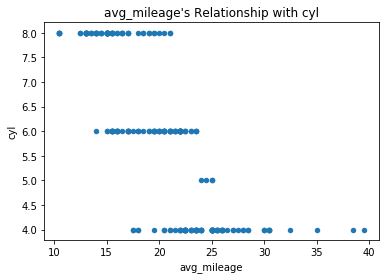

In [110]:
correlation_exploration(mpg, 'avg_mileage', 'cyl')

In [ ]:
We reject the Null hypothesis based on our low p-value. Our r-squared score of -0.79 informs us that there is a negative correlation between average mileage and the number of cylinders a vehicle has. The more cylinders, the lower the gas mileage.

### We reject the null hypothesis base on our low p-value. Our rsquared value of -0.79 informs us that there is a negative correlation between average mileage and the number of cylinders a vehicle has. The more